## Distributions - Combining DataFrames with pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
survey_df = pd.read_csv("../In-class sessions/surveys.csv")
species_df = pd.read_csv("../In-class sessions/species.csv")

In [3]:
merged_left = pd.merge(survey_df, species_df, how='left')
merged_left.head()

record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight      genus   species    taxa  
0     NaN        NaN       NaN     NaN  
1     NaN        NaN       NaN     NaN  
2     NaN  Dipodomys  merriami  Rodent  
3     NaN  Dipodomys  merriami  Rodent  
4     NaN  Dipodomys  merriami  Rodent

In [4]:
merged_left['taxa'].unique()
merged_left['taxa'] = merged_left['taxa'].fillna('Unknown Taxa')

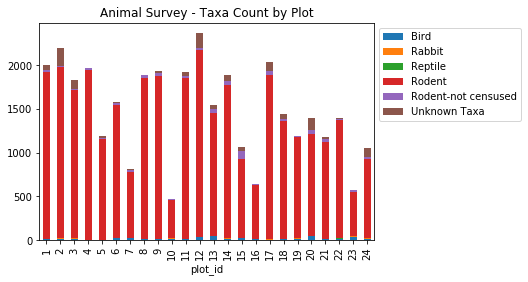

In [5]:
merged_left.groupby(['plot_id', 'taxa']).count()['record_id'].unstack().plot(kind='bar',stacked=True, title='Animal Survey - Taxa Count by Plot')
plt.legend(bbox_to_anchor=(1, 1))

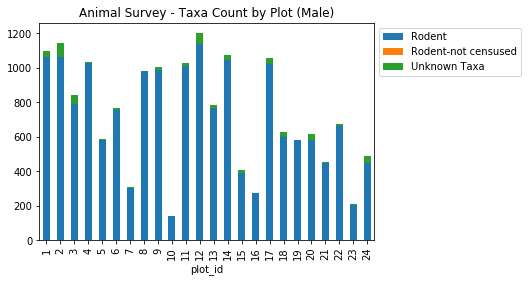

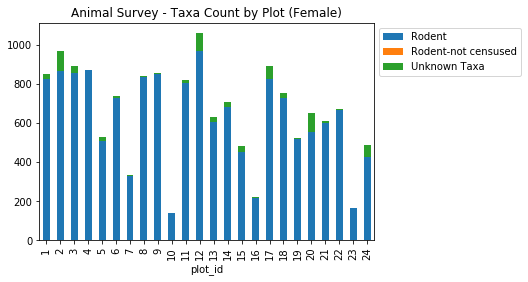

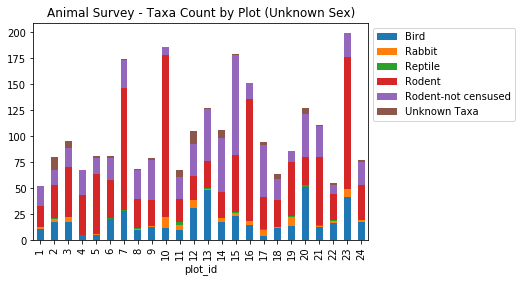

In [6]:
merged_left_m = merged_left[merged_left['sex']=='M']
merged_left_f = merged_left[merged_left['sex']=='F']
merged_left_un = merged_left[merged_left['sex'].isna()]

merged_left_m.groupby(['plot_id', 'taxa']).count()['record_id'].unstack().plot(kind='bar',stacked=True, title='Animal Survey - Taxa Count by Plot (Male)')
plt.legend(bbox_to_anchor=(1, 1))
merged_left_f.groupby(['plot_id', 'taxa']).count()['record_id'].unstack().plot(kind='bar',stacked=True, title='Animal Survey - Taxa Count by Plot (Female)')
plt.legend(bbox_to_anchor=(1, 1))
merged_left_un.groupby(['plot_id', 'taxa']).count()['record_id'].unstack().plot(kind='bar',stacked=True, title='Animal Survey - Taxa Count by Plot (Unknown Sex)')
plt.legend(bbox_to_anchor=(1, 1))

## Diversity index - Combining DataFrames with pandas

In [7]:
plots_df = pd.read_csv("../In-class sessions/plots.csv")

In [8]:
plots_df.groupby(['plot_type']).count()

plot_id
plot_type                         
Control                          8
Long-term Krat Exclosure         4
Rodent Exclosure                 6
Short-term Krat Exclosure        4
Spectab exclosure                2

In [9]:
print(merged_left['species_id'].nunique())
print(merged_left['species'].nunique())
# An interesting finding - There are more unique 'species_id' than 'species'

48
40


In [10]:
merged_left[['species_id','genus','species']].drop_duplicates()
# Some observations here: There are many species with an 'sp.' entry, which may mean that the species is unknown.
# There are also 'genus' entries that do not look valid, like 'Sparrow', 'Rodent', and 'Lizard'
# For the sake of calculating the Biodiversity Index, I will treat the unique count of 'species_id' as being different species

species_id             genus          species
0             NL               NaN              NaN
2             DM         Dipodomys         merriami
5             PF       Perognathus           flavus
6             PE        Peromyscus         eremicus
10            DS         Dipodomys      spectabilis
17            PP       Chaetodipus     penicillatus
23            SH          Sigmodon         hispidus
35            OT         Onychomys         torridus
67            DO         Dipodomys            ordii
69            OX         Onychomys              sp.
76            SS      Spermophilus        spilosoma
273           OL         Onychomys      leucogaster
310           RM   Reithrodontomys        megalotis
323          NaN           Neotoma         albigula
778           SA        Sylvilagus        audubonii
882           PM        Peromyscus      maniculatus
1445          AH  Ammospermophilus          harrisi
2705          DX         Dipodomys              sp.
3125          AB        Amphispiza        bilineata
3188          CB   Campylorhynchus  brunneicapillus
3189          CM       Calamospiza      melanocorys
3199          CQ        Callipepla         squamata
5763          RF   Reithrodontomys       fulvescens
6566          PC            Pipilo        chlorurus
7351          PG         Pooecetes        gramineus
9475          PH       Perognathus         hispidus
9642          PU            Pipilo           fuscus
13312         CV          Crotalus          viridis
13563         UR            Rodent              sp.
13687         UP            Pipilo              sp.
14249         ZL       Zonotrichia       leucophrys
14465         UL            Lizard              sp.
15877         CS          Crotalus       scutalatus
16001         SC        Sceloporus           clarki
16597         BA           Baiomys          taylori
16658         SF          Sigmodon      fulviventer
18870         RO   Reithrodontomys         montanus
18931         AS        Ammodramus       savannarum
19124         SO          Sigmodon     ochrognathus
20407         PI       Chaetodipus      intermedius
20722         ST      Spermophilus     tereticaudus
21208         CU     Cnemidophorus        uniparens
21806         SU        Sceloporus        undulatus
22284         RX   Reithrodontomys              sp.
22710         PB       Chaetodipus          baileyi
22816         PL        Peromyscus         leucopus
23434         PX       Chaetodipus              sp.
28987         CT     Cnemidophorus           tigris
35511         US           Sparrow              sp.

In [11]:
print(merged_left[merged_left['species_id'].isna()][['species_id','genus','species']].head())
print(merged_left[merged_left['species_id'].isna()][['species_id','genus','species']].nunique())
# There is also one 'species_id' that is NaN but has a valid 'species' entry - I will fill it for calculation purposes

    species_id    genus   species
323        NaN  Neotoma  albigula
324        NaN  Neotoma  albigula
325        NaN  Neotoma  albigula
400        NaN  Neotoma  albigula
401        NaN  Neotoma  albigula
species_id    0
genus         1
species       1
dtype: int64


In [12]:
merged_left['species_id'] = merged_left['species_id'].fillna('NA')
merged_left['species_id'].nunique()

49

In [13]:
print(merged_left[merged_left['plot_id']==1]['record_id'].count())
print(merged_left[merged_left['plot_id']==1]['species_id'].nunique())

1995
24


In [14]:
biodiversity_index = np.zeros(24)
for i in (np.sort(merged_left['plot_id'].unique())-1):
    biodiversity_index[i] = merged_left[merged_left['plot_id']==(i+1)]['species_id'].nunique() / merged_left[merged_left['plot_id']==(i+1)]['record_id'].count()    

In [15]:
plots_df['biodiversity_index'] = biodiversity_index
plots_df

plot_id                  plot_type  biodiversity_index
0         1          Spectab exclosure            0.012030
1         2                    Control            0.013218
2         3   Long-term Krat Exclosure            0.016958
3         4                    Control            0.010665
4         5           Rodent Exclosure            0.022613
5         6  Short-term Krat Exclosure            0.015171
6         7           Rodent Exclosure            0.026961
7         8                    Control            0.012692
8         9          Spectab exclosure            0.012913
9        10           Rodent Exclosure            0.051173
10       11                    Control            0.015641
11       12                    Control            0.010994
12       13  Short-term Krat Exclosure            0.017555
13       14                    Control            0.012732
14       15   Long-term Krat Exclosure            0.025257
15       16           Rodent Exclosure            0.035604
16       17                    Control            0.010790
17       18  Short-term Krat Exclosure            0.018685
18       19   Long-term Krat Exclosure            0.023549
19       20  Short-term Krat Exclosure            0.018705
20       21   Long-term Krat Exclosure            0.023018
21       22                    Control            0.017155
22       23           Rodent Exclosure            0.049037
23       24           Rodent Exclosure            0.020992

Text(0, 0.5, 'Biodiversity Index')

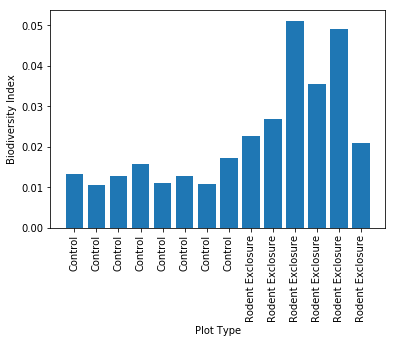

In [16]:
plots_df_temp = plots_df[plots_df['plot_type'].isin(['Control', 'Rodent Exclosure'])].sort_values('plot_type').reset_index(drop=True)
plt.bar(plots_df_temp.index, plots_df_temp.biodiversity_index)
plt.xticks(plots_df_temp.index, plots_df_temp.plot_type, rotation='vertical')
plt.xlabel('Plot Type')
plt.ylabel('Biodiversity Index')

Text(0, 0.5, 'Biodiversity Index')

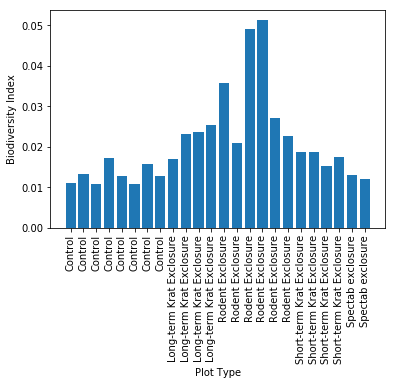

In [17]:
plots_df_temp_2 = plots_df.sort_values('plot_type').reset_index(drop=True)
plt.bar(plots_df_temp_2.index, plots_df_temp_2.biodiversity_index)
plt.xticks(plots_df_temp_2.index, plots_df_temp_2.plot_type, rotation='vertical')
plt.xlabel('Plot Type')
plt.ylabel('Biodiversity Index')

## Join on Multiple Columns - Sleep & Exercise Data

In [296]:
from datetime import datetime, timedelta
pd.set_option('display.max_columns', 5000)

In [318]:
sleep_df = pd.read_csv('../Project/sleep-export2.csv')
exercise_df = pd.read_csv('../Project/exercise.csv')

In [338]:
sleep_df.head()

Unnamed: 0  efficiency  has_sleep_data  \
0           0   92.663040             1.0   
1           1   87.788020             1.0   
2           2   90.026955             1.0   
3           3   93.162390             1.0   
4           4   93.750000             1.0   

      com.samsung.health.sleep.datauuid  quality  \
0  03f12ce0-9ade-5c74-9d57-686fd3966f2a  50003.0   
1  0419de25-ff8a-e425-0864-7e83b7f5d991      NaN   
2  048b90e0-1e31-7875-337c-e9d8c24bea59      NaN   
3  058e45d4-2bda-fc5f-6545-c965c65fea43      NaN   
4  059021fb-39a7-ab8c-e488-662743e11821      NaN   

   com.samsung.health.sleep.custom com.samsung.health.sleep.end_time  \
0                              NaN               2018-03-08 09:30:00   
1                              NaN               2018-02-25 13:28:00   
2                              NaN               2018-06-02 09:49:00   
3                              NaN               2018-06-23 10:32:00   
4                              NaN               2018-01-05 13:41:00   

   original_wake_up_time com.samsung.health.sleep.start_time  \
0           1.520501e+12                 2018-03-08 03:23:00   
1                    NaN                 2018-02-25 06:15:00   
2                    NaN                 2018-06-02 03:37:00   
3                    NaN                 2018-06-23 06:39:00   
4                    NaN                 2018-01-05 04:54:00   

  com.samsung.health.sleep.time_offset com.samsung.health.sleep.update_time  \
0                             UTC-0400              2018-03-08 13:39:58.387   
1                             UTC-0400              2018-02-25 13:30:16.332   
2                             UTC-0300              2018-06-02 09:49:32.094   
3                             UTC-0300              2018-06-23 10:47:26.337   
4                             UTC-0400              2018-01-05 13:44:59.850   

   original_bed_time com.samsung.health.sleep.create_time  \
0       1.520479e+12              2018-03-08 09:32:02.181   
1                NaN              2018-02-25 13:30:16.332   
2                NaN              2018-06-02 09:49:32.094   
3                NaN              2018-06-23 10:47:26.337   
4                NaN              2018-01-05 13:44:59.850   

   original_efficiency        Date Sleep_Start Sleep_End  
0             92.66304  2018-03-08    03:23:00  09:30:00  
1                  NaN  2018-02-25    06:15:00  13:28:00  
2                  NaN  2018-06-02    03:37:00  09:49:00  
3                  NaN  2018-06-23    06:39:00  10:32:00  
4                  NaN  2018-01-05    04:54:00  13:41:00

In [339]:
exercise_df.head()

Unnamed: 0                end_time  altitude_loss  max_altitude  \
0           0 2018-04-07 17:40:40.673            NaN           NaN   
1           1 2018-01-27 10:08:00.000            NaN           NaN   
2           2 2018-05-01 18:12:20.915            NaN           NaN   
3           3 2018-02-24 13:50:02.929            NaN           NaN   
4           4 2018-03-16 17:25:39.584            NaN           NaN   

               start_time  count  altitude_gain  exercise_custom_type  \
0 2018-04-07 17:26:10.149    NaN            NaN                   NaN   
1 2018-01-27 09:38:00.000    0.0            NaN                   NaN   
2 2018-05-01 18:01:24.059    NaN            NaN                   NaN   
3 2018-02-24 13:35:13.243    NaN            NaN                   NaN   
4 2018-03-16 17:15:20.192    NaN            NaN                   NaN   

   duration  deviceuuid  max_heart_rate  max_rpm  mean_heart_rate  \
0    870524  F/D7+hL5E5             0.0      NaN              0.0   
1   1800000  jQfnryI8/B             NaN      NaN              NaN   
2    656856  F/D7+hL5E5             0.0      NaN              0.0   
3    889686  F/D7+hL5E5             0.0      NaN              0.0   
4    619392  F/D7+hL5E5             0.0      NaN              0.0   

                      pkg_name  max_cadence time_offset  \
0  com.sec.android.app.shealth          0.0    UTC-0300   
1  com.sec.android.app.shealth          NaN    UTC-0400   
2  com.sec.android.app.shealth          0.0    UTC-0300   
3  com.sec.android.app.shealth          0.0    UTC-0400   
4  com.sec.android.app.shealth          0.0    UTC-0300   

   mean_caloricburn_rate  incline_distance  exercise_type  decline_distance  \
0                    NaN               NaN           1001               NaN   
1                    NaN               NaN          14001               NaN   
2                    NaN               NaN           1001               NaN   
3                    NaN               NaN          11007               NaN   
4                    NaN               NaN           1001               NaN   

   max_speed  mean_power  max_power  mean_rpm  calorie  mean_cadence  \
0   1.588526         NaN        NaN       NaN   58.420           0.0   
1        NaN         NaN        NaN       NaN  252.000           NaN   
2   1.571783         NaN        NaN       NaN   43.850           0.0   
3        NaN         NaN        NaN       NaN  166.074           0.0   
4   1.611111         NaN        NaN       NaN   42.630           0.0   

   mean_speed              update_time  min_altitude  min_heart_rate  \
0    1.257754  2018-04-07 17:41:42.416           NaN             0.0   
1    0.000000  2018-01-27 10:09:23.176           NaN             NaN   
2    1.323111  2018-05-01 18:13:21.374           NaN             0.0   
3         NaN  2018-02-24 13:52:08.229           NaN             0.0   
4    1.413036  2018-03-16 17:26:39.581           NaN             0.0   

   count_type                                          live_data  \
0         NaN  009c4899-f8fb-c887-294a-045dcce7c880.live_data...   
1     30004.0                                                NaN   
2         NaN  020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...   
3         NaN  0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...   
4         NaN  02c7f233-9af6-3288-e412-21747dcd9a98.live_data...   

   max_caloricburn_rate  custom comment  additional  distance  \
0                   NaN     NaN     NaN         NaN  1008.610   
1                   NaN     NaN     NaN         NaN     0.000   
2                   NaN     NaN     NaN         NaN   765.120   
3                   NaN     NaN     NaN         NaN       NaN   
4                   NaN     NaN     NaN         NaN   741.521   

                               datauuid              create_time        Date  \
0  009c4899-f8fb-c887-294a-045dcce7c880  2018-04-07 17:41:42.416  2018-04-07   
1  013f807f-0b24-45da-9df7-446c2e297a4f  2018-01-27 10:08:40.225  2018-0

In [321]:
sleep_df['com.samsung.health.sleep.start_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.start_time'], unit='ms')
sleep_df['com.samsung.health.sleep.end_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.end_time'], unit='ms')
sleep_df['com.samsung.health.sleep.create_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.create_time'], unit='ms')
sleep_df['com.samsung.health.sleep.update_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.update_time'], unit='ms')

In [322]:
sleep_df['com.samsung.health.sleep.start_time'].sort_values()

26    2017-12-16 05:02:00
175   2017-12-18 03:31:00
43    2017-12-20 03:55:00
116   2017-12-22 08:57:00
167   2017-12-23 09:48:00
134   2017-12-24 05:31:00
189   2017-12-25 04:52:00
123   2017-12-25 23:16:00
258   2017-12-26 10:34:00
210   2017-12-28 06:38:00
95    2017-12-29 09:03:00
168   2017-12-30 07:25:00
236   2017-12-31 05:53:00
88    2018-01-01 06:20:00
7     2018-01-01 11:20:00
118   2018-01-02 07:10:00
268   2018-01-03 02:56:00
138   2018-01-03 04:55:00
197   2018-01-03 05:22:00
230   2018-01-03 05:58:00
51    2018-01-04 04:15:00
4     2018-01-05 04:54:00
124   2018-01-06 04:14:00
206   2018-01-07 04:46:00
24    2018-01-07 11:21:00
228   2018-01-08 02:28:00
104   2018-01-09 04:17:00
34    2018-01-10 03:55:00
173   2018-01-11 03:30:00
212   2018-01-12 03:34:00
              ...        
150   2018-07-06 01:58:00
273   2018-07-07 02:54:00
75    2018-07-07 19:11:00
192   2018-07-08 03:29:00
255   2018-07-08 20:35:00
46    2018-07-09 04:03:00
213   2018-07-10 01:51:00
106   2018-0

In [323]:
exercise_df['start_time'].sort_values()

255    2016-06-25 10:28:30.517
112    2016-09-24 18:22:47.097
299    2016-09-27 20:21:42.571
208    2016-09-30 21:29:56.624
122    2017-03-06 10:05:28.618
146    2017-03-07 09:48:16.225
189    2017-11-28 16:15:59.218
309    2017-12-17 16:29:25.721
175    2017-12-18 08:06:21.358
63     2017-12-18 16:28:56.911
239    2017-12-19 15:06:26.046
206    2017-12-20 15:41:16.388
286    2017-12-20 16:05:57.725
314    2017-12-20 16:53:55.246
100    2017-12-21 19:24:51.128
329    2017-12-24 11:44:37.515
197    2017-12-24 12:16:05.548
139    2017-12-26 14:16:17.449
52     2017-12-27 14:36:53.864
35     2017-12-29 15:15:21.996
7      2017-12-29 15:32:24.297
267    2017-12-30 14:43:41.486
294    2017-12-30 16:04:42.524
279    2017-12-30 16:56:30.757
210    2017-12-31 13:23:53.343
201    2017-12-31 23:54:54.101
315    2018-01-01 15:06:24.463
339    2018-01-03 08:02:02.274
85     2018-01-03 15:00:03.762
326    2018-01-03 15:59:34.532
                ...           
226    2018-04-22 07:29:01.000
9      2

#### Observations

There is some overlap in dates between sleep_df and exercise_df. Thus it would make sense to merge them by date, with each row of the merged dataframe containing time information for sleep and exercise if they coincide.

There is also the very important row of 'time_offset' in both dataframes - It would make sense to merge by this column as well, but let's analyse this column further before doing so.

In [324]:
sleep_df['Date'] = sleep_df['com.samsung.health.sleep.end_time'].dt.date
sleep_df['Sleep_Start'] = sleep_df['com.samsung.health.sleep.start_time'].dt.time
sleep_df['Sleep_End'] = sleep_df['com.samsung.health.sleep.end_time'].dt.time

In [325]:
sleep_df.head()

Unnamed: 0  efficiency  has_sleep_data  \
0           0   92.663040             1.0   
1           1   87.788020             1.0   
2           2   90.026955             1.0   
3           3   93.162390             1.0   
4           4   93.750000             1.0   

      com.samsung.health.sleep.datauuid  quality  \
0  03f12ce0-9ade-5c74-9d57-686fd3966f2a  50003.0   
1  0419de25-ff8a-e425-0864-7e83b7f5d991      NaN   
2  048b90e0-1e31-7875-337c-e9d8c24bea59      NaN   
3  058e45d4-2bda-fc5f-6545-c965c65fea43      NaN   
4  059021fb-39a7-ab8c-e488-662743e11821      NaN   

   com.samsung.health.sleep.custom com.samsung.health.sleep.end_time  \
0                              NaN               2018-03-08 09:30:00   
1                              NaN               2018-02-25 13:28:00   
2                              NaN               2018-06-02 09:49:00   
3                              NaN               2018-06-23 10:32:00   
4                              NaN               2018-01-05 13:41:00   

   original_wake_up_time com.samsung.health.sleep.start_time  \
0           1.520501e+12                 2018-03-08 03:23:00   
1                    NaN                 2018-02-25 06:15:00   
2                    NaN                 2018-06-02 03:37:00   
3                    NaN                 2018-06-23 06:39:00   
4                    NaN                 2018-01-05 04:54:00   

  com.samsung.health.sleep.time_offset com.samsung.health.sleep.update_time  \
0                             UTC-0400              2018-03-08 13:39:58.387   
1                             UTC-0400              2018-02-25 13:30:16.332   
2                             UTC-0300              2018-06-02 09:49:32.094   
3                             UTC-0300              2018-06-23 10:47:26.337   
4                             UTC-0400              2018-01-05 13:44:59.850   

   original_bed_time com.samsung.health.sleep.create_time  \
0       1.520479e+12              2018-03-08 09:32:02.181   
1                NaN              2018-02-25 13:30:16.332   
2                NaN              2018-06-02 09:49:32.094   
3                NaN              2018-06-23 10:47:26.337   
4                NaN              2018-01-05 13:44:59.850   

   original_efficiency        Date Sleep_Start Sleep_End  
0             92.66304  2018-03-08    03:23:00  09:30:00  
1                  NaN  2018-02-25    06:15:00  13:28:00  
2                  NaN  2018-06-02    03:37:00  09:49:00  
3                  NaN  2018-06-23    06:39:00  10:32:00  
4                  NaN  2018-01-05    04:54:00  13:41:00

In [328]:
exercise_df['start_time'] = pd.to_datetime(exercise_df['start_time'])
exercise_df['end_time'] = pd.to_datetime(exercise_df['end_time'])

In [317]:
exercise_df.groupby('time_offset').count()

Unnamed: 0  end_time  altitude_loss  max_altitude  start_time  \
time_offset                                                                  
UTC-0300            158       158              0             0         158   
UTC-0400            163       163              3             4         163   
UTC-0600              4         4              4             4           4   
UTC-0700             16        16              0             2          16   

             count  altitude_gain  exercise_custom_type  duration  deviceuuid  \
time_offset                                                                     
UTC-0300        10              0                     0       158         158   
UTC-0400        26              3                     0       163         163   
UTC-0600         0              4                     0         4           4   
UTC-0700         0              0                     0        16          16   

             max_heart_rate  max_rpm  mean_heart_rate  pkg_name  max_cadence  \
time_offset                                                                    
UTC-0300                 91        0               91       158           91   
UTC-0400                112        0              112       163          113   
UTC-0600                  0        0                0         4            0   
UTC-0700                 16        0               16        16           16   

             mean_caloricburn_rate  incline_distance  exercise_type  \
time_offset                                                           
UTC-0300                         0                 8            158   
UTC-0400                         0                33            163   
UTC-0600                         0                 4              4   
UTC-0700                         0                 6             16   

             decline_distance  max_speed  mean_power  max_power  mean_rpm  \
time_offset                                                                 
UTC-0300                    8        139           0          0         0   
UTC-0400                   33        101           0          0         0   
UTC-0600                    4          4           0          0         0   
UTC-0700                    6         12           0          0         0   

             calorie  mean_cadence  mean_speed  update_time  min_altitude  \
time_offset                                                                 
UTC-0300         158            91         157          158             0   
UTC-0400         163           113         152          163             4   
UTC-0600           4             0           4            4             4   
UTC-0700          16            16          16           16             2   

             min_heart_rate  count_type  live_data  max_caloricburn_rate  \
time_offset                                                                
UTC-0300                 91          10        148                     0   
UTC-0400                112          26        140                     0   
UTC-0600                  0           0          4                     0   
UTC-0700                 16           0         16                     0   

             custom  comment  additional  distance  datauuid  create_time  
time_offset                                                                
UTC-0300          0        0           0       157       158          158  
UTC-0400          0        1           0       152       163          163  
UTC-0600          0        0           0         4         4            4  
UTC-0700          0        0           0        16        16           16

In [326]:
sleep_df.groupby('com.samsung.health.sleep.time_offset').count()

Unnamed: 0  efficiency  has_sleep_data  \
com.samsung.health.sleep.time_offset                                           
UTC-0300                                     188         188             186   
UTC-0400                                      79          79              79   
UTC-0700                                      12          12              12   

                                      com.samsung.health.sleep.datauuid  \
com.samsung.health.sleep.time_offset                                      
UTC-0300                                                            188   
UTC-0400                                                             79   
UTC-0700                                                             12   

                                      quality  \
com.samsung.health.sleep.time_offset            
UTC-0300                                    4   
UTC-0400                                   34   
UTC-0700                                    0   

                                      com.samsung.health.sleep.custom  \
com.samsung.health.sleep.time_offset                                    
UTC-0300                                                            0   
UTC-0400                                                            0   
UTC-0700                                                            0   

                                      com.samsung.health.sleep.end_time  \
com.samsung.health.sleep.time_offset                                      
UTC-0300                                                            188   
UTC-0400                                                             79   
UTC-0700                                                             12   

                                      original_wake_up_time  \
com.samsung.health.sleep.time_offset                          
UTC-0300                                                  2   
UTC-0400                                                 34   
UTC-0700                                                  0   

                                      com.samsung.health.sleep.start_time  \
com.samsung.health.sleep.time_offset                                        
UTC-0300                                                              188   
UTC-0400                                                               79   
UTC-0700                                                               12   

                                      com.samsung.health.sleep.update_time  \
com.samsung.health.sleep.time_offset                                         
UTC-0300                                                               188   
UTC-0400                                                                79   
UTC-0700                                                                12   

                                      original_bed_time  \
com.samsung.health.sleep.time_offset                      
UTC-0300                                              2   
UTC-0400                                             34   
UTC-0700                                              0   

                                      com.samsung.health.sleep.create_time  \
com.samsung.health.sleep.time_offset                                         
UTC-0300                                                               188   
UTC-0400                                                                79   
UTC-0700                                                                12   

                                      original_efficiency  Date  Sleep_Start  \
com.samsung.health.sleep.time_offset                                           
UTC-0300                                                2   188          188   
UTC-0400                                               34    79           79   
UTC-0700                                                0    12           12   

                                      Sleep_End  
com.samsung.health.sleep.time_offset      

In [329]:
exercise_df['Date'] = exercise_df['start_time'].dt.date
exercise_df['Exercise_Start'] = exercise_df['start_time'].dt.time
exercise_df['Exercise_End'] = exercise_df['end_time'].dt.time

In [335]:
exercise_df[['Date', 'time_offset']].sort_values('Date')

Date time_offset
255  2016-06-25    UTC-0600
112  2016-09-24    UTC-0600
299  2016-09-27    UTC-0600
208  2016-09-30    UTC-0600
122  2017-03-06    UTC-0400
146  2017-03-07    UTC-0400
189  2017-11-28    UTC-0400
309  2017-12-17    UTC-0400
175  2017-12-18    UTC-0400
63   2017-12-18    UTC-0400
239  2017-12-19    UTC-0400
314  2017-12-20    UTC-0700
286  2017-12-20    UTC-0700
206  2017-12-20    UTC-0700
100  2017-12-21    UTC-0700
197  2017-12-24    UTC-0700
329  2017-12-24    UTC-0700
139  2017-12-26    UTC-0700
52   2017-12-27    UTC-0700
7    2017-12-29    UTC-0700
35   2017-12-29    UTC-0700
267  2017-12-30    UTC-0700
279  2017-12-30    UTC-0700
294  2017-12-30    UTC-0700
210  2017-12-31    UTC-0700
201  2017-12-31    UTC-0700
315  2018-01-01    UTC-0700
339  2018-01-03    UTC-0400
85   2018-01-03    UTC-0400
258  2018-01-03    UTC-0400
..          ...         ...
9    2018-04-22    UTC-0300
140  2018-04-22    UTC-0300
332  2018-04-22    UTC-0300
25   2018-04-22    UTC-0300
250  2018-04-22    UTC-0300
178  2018-04-23    UTC-0300
327  2018-04-23    UTC-0300
149  2018-04-24    UTC-0300
14   2018-04-24    UTC-0300
195  2018-04-24    UTC-0300
273  2018-04-26    UTC-0300
115  2018-04-26    UTC-0300
321  2018-04-26    UTC-0300
233  2018-04-26    UTC-0300
83   2018-04-27    UTC-0300
336  2018-04-27    UTC-0300
66   2018-04-27    UTC-0300
330  2018-04-27    UTC-0300
169  2018-04-28    UTC-0300
148  2018-04-29    UTC-0300
308  2018-04-30    UTC-0300
280  2018-05-01    UTC-0300
2    2018-05-01    UTC-0300
5    2018-05-01    UTC-0300
199  2018-05-01    UTC-0300
40   2018-05-02    UTC-0300
166  2018-05-02    UTC-0300
24   2018-05-02    UTC-0300
76   2018-05-02    UTC-0300
131  2018-05-03    UTC-0300

[341 rows x 2 columns]

In [337]:
sleep_df[['Date', 'com.samsung.health.sleep.time_offset']].sort_values('Date')

Date com.samsung.health.sleep.time_offset
26   2017-12-16                             UTC-0400
175  2017-12-18                             UTC-0400
43   2017-12-20                             UTC-0400
116  2017-12-22                             UTC-0700
167  2017-12-23                             UTC-0700
134  2017-12-24                             UTC-0700
189  2017-12-25                             UTC-0700
258  2017-12-26                             UTC-0700
123  2017-12-26                             UTC-0700
210  2017-12-28                             UTC-0700
95   2017-12-29                             UTC-0700
168  2017-12-30                             UTC-0700
236  2017-12-31                             UTC-0700
88   2018-01-01                             UTC-0700
7    2018-01-01                             UTC-0700
118  2018-01-02                             UTC-0400
197  2018-01-03                             UTC-0400
230  2018-01-03                             UTC-0400
268  2018-01-03                             UTC-0400
138  2018-01-03                             UTC-0400
51   2018-01-04                             UTC-0400
4    2018-01-05                             UTC-0400
124  2018-01-06                             UTC-0400
206  2018-01-07                             UTC-0400
24   2018-01-07                             UTC-0400
228  2018-01-08                             UTC-0400
104  2018-01-09                             UTC-0400
34   2018-01-10                             UTC-0400
173  2018-01-11                             UTC-0400
212  2018-01-12                             UTC-0400
..          ...                                  ...
150  2018-07-06                             UTC-0300
273  2018-07-07                             UTC-0300
75   2018-07-07                             UTC-0300
192  2018-07-08                             UTC-0300
255  2018-07-08                             UTC-0300
46   2018-07-09                             UTC-0300
213  2018-07-10                             UTC-0300
106  2018-07-11                             UTC-0300
29   2018-07-12                             UTC-0300
52   2018-07-13                             UTC-0300
263  2018-07-13                             UTC-0300
171  2018-07-14                             UTC-0300
209  2018-07-15                             UTC-0300
47   2018-07-15                             UTC-0300
58   2018-07-15                             UTC-0300
90   2018-07-16                             UTC-0300
89   2018-07-17                             UTC-0300
182  2018-07-18                             UTC-0300
76   2018-07-19                             UTC-0300
137  2018-07-20                             UTC-0300
229  2018-07-21                             UTC-0300
86   2018-07-22                             UTC-0300
219  2018-07-22                             UTC-0300
126  2018-07-23                             UTC-0300
42   2018-07-24                             UTC-0300
59   2018-07-25                             UTC-0300
169  2018-07-26                             UTC-0300
13   2018-07-27                             UTC-0300
78   2018-07-28                             UTC-0300
214  2018-07-29                             UTC-0300

[279 rows x 2 columns]

In [399]:
exercise_df[pd.to_datetime(exercise_df['Date']) == '2018-01-03']

Unnamed: 0                end_time  altitude_loss  max_altitude  \
85           85 2018-01-03 15:10:20.703            NaN           NaN   
258         258 2018-01-03 20:40:55.492            NaN           NaN   
326         326 2018-01-03 16:13:07.240            NaN           NaN   
339         339 2018-01-03 08:16:16.426            NaN           NaN   

                 start_time  count  altitude_gain  exercise_custom_type  \
85  2018-01-03 15:00:03.762    NaN            NaN                   NaN   
258 2018-01-03 19:11:25.907    NaN            NaN                   NaN   
326 2018-01-03 15:59:34.532    NaN            NaN                   NaN   
339 2018-01-03 08:02:02.274    NaN            NaN                   NaN   

     duration  deviceuuid  max_heart_rate  max_rpm  mean_heart_rate  \
85     616941  F/D7+hL5E5             0.0      NaN              0.0   
258   5363575  F/D7+hL5E5           179.0      NaN            135.0   
326    812708  F/D7+hL5E5             0.0      NaN              0.0   
339    854152  F/D7+hL5E5             0.0      NaN              0.0   

                        pkg_name  max_cadence time_offset  \
85   com.sec.android.app.shealth          0.0    UTC-0400   
258  com.sec.android.app.shealth          0.0    UTC-0400   
326  com.sec.android.app.shealth          0.0    UTC-0400   
339  com.sec.android.app.shealth          0.0    UTC-0400   

     mean_caloricburn_rate  incline_distance  exercise_type  decline_distance  \
85                     NaN               NaN           1001               NaN   
258                    NaN               0.0              0               0.0   
326                    NaN               NaN           1001               NaN   
339                    NaN               NaN              0               NaN   

     max_speed  mean_power  max_power  mean_rpm  calorie  mean_cadence  \
85    1.768873         NaN        NaN       NaN   42.750           0.0   
258        NaN         NaN        NaN       NaN  475.419           0.0   
326   1.856852         NaN        NaN       NaN   66.440           0.0   
339        NaN         NaN        NaN       NaN   81.620           0.0   

     mean_speed              update_time  min_altitude  min_heart_rate  \
85     1.473489  2018-01-03 15:58:08.767           NaN             0.0   
258    0.000000  2018-01-03 20:45:11.993           NaN            71.0   
326    1.509597  2018-01-03 16:14:07.428           NaN             0.0   
339         NaN  2018-01-03 20:45:29.534           NaN             0.0   

     count_type                                          live_data  \
85          NaN  431a0edf-2c65-6d26-8101-200c9d4682a6.live_data...   
258         NaN  c6ec6e4a-c220-dd99-7d0f-188364f7e29b.live_data...   
326         NaN  f26ab1e0-0b5d-f7c7-086f-3c7c03099be6.live_data...   
339         NaN  fc9df030-4c77-e9ed-b932-88a929684a1f.live_data...   

     max_caloricburn_rate  custom comment  additional  distance  \
85                    NaN     NaN     NaN         NaN    761.17   
258                   NaN     NaN     NaN         NaN      0.00   
326                   NaN     NaN     NaN         NaN    965.54   
339                   NaN     NaN     NaN         NaN       NaN   

                                 datauuid              create_time  \
85   431a0edf-2c65-6d26-8101-200c9d4682a6  2018-01-03 15:11:20.405   
258  c6ec6e4a-c220-dd99-7d0f-188364f7e29b  2018-01-03 20:40:55.723   
326  f26ab1e0-0b5d-f7c7-086f-3c7c03099be6  2018-01-03 16:14:07.428   
339  fc9df030-4c77-e9ed-b932-88a929684a1f  2018-01-03 08:17:17.361   

           Date   Exercise_Start     Exercise_End  
85   2018-01-03  15:00:03.762000  15:10:20.703000  
258  2018-01-03  19:11:25.907000  20:40:55.492000  
326  2018-01-03  15:59:34.532000  16:13:07.240000  
339  2018-01-03  08:02:02.274000  08:16:16.426000

In [398]:
sleep_df[pd.to_datetime(sleep_df['Date']) == '2018-01-03']

Unnamed: 0  efficiency  has_sleep_data  \
138         138     0.00000             1.0   
197         197     0.00000             1.0   
230         230    94.85715             1.0   
268         268    72.72727             1.0   

        com.samsung.health.sleep.datauuid  quality  \
138  78d01a70-9f6d-3a94-505a-dfc6bdb18ed2      NaN   
197  ad17d745-a7bd-5a6b-f886-b9c2b6b77dd0      NaN   
230  c951e281-e034-5cda-9119-110eabd0557e      NaN   
268  f4102932-0997-e575-1483-aa96681a1a28      NaN   

     com.samsung.health.sleep.custom com.samsung.health.sleep.end_time  \
138                              NaN               2018-01-03 05:05:00   
197                              NaN               2018-01-03 05:38:00   
230                              NaN               2018-01-03 11:47:00   
268                              NaN               2018-01-03 04:01:00   

     original_wake_up_time com.samsung.health.sleep.start_time  \
138                    NaN                 2018-01-03 04:55:00   
197                    NaN                 2018-01-03 05:22:00   
230                    NaN                 2018-01-03 05:58:00   
268                    NaN                 2018-01-03 02:56:00   

    com.samsung.health.sleep.time_offset com.samsung.health.sleep.update_time  \
138                             UTC-0400              2018-01-03 05:19:48.280   
197                             UTC-0400              2018-01-03 05:53:17.298   
230                             UTC-0400              2018-01-03 12:02:12.286   
268                             UTC-0400              2018-01-03 04:02:18.717   

     original_bed_time com.samsung.health.sleep.create_time  \
138                NaN              2018-01-03 05:19:48.280   
197                NaN              2018-01-03 05:53:17.298   
230                NaN              2018-01-03 12:02:12.286   
268                NaN              2018-01-03 04:02:18.717   

     original_efficiency        Date Sleep_Start Sleep_End  
138                  NaN  2018-01-03    04:55:00  05:05:00  
197                  NaN  2018-01-03    05:22:00  05:38:00  
230                  NaN  2018-01-03    05:58:00  11:47:00  
268                  NaN  2018-01-03    02:56:00  04:01:00

#### Some More Observations
Already there is some discrepancy with timezones on 2017-12-20. Above, I have extracted date from sleep_df end time, and from exercise_df start time.

The person woke up that day in UTC-0400, traveled to UTC-0700, then started exercising in 3 different occasions.

Also from above, it can be seen that there are days such as 2018-01-03 with multiple entries on both sleep_df and exercise_df. Therefore it will not work to merge on both date and time_offset, as there will be 16 combinations for each of the 4 row entries on just that one day - does not make much sense.

The tables will be merged by date and hour.
One merge will be by end-time hour for sleep_df and start-time hour for exercise_df.
Another merge will be by start-time hour for sleep_df and end-time hour for exercise_df.

These two merges will then be concatenated - All possible overlap where the person sleeps right after exercise or exercises right after waking up will be shown.

In [400]:
sleep_df['Sleep_Start_Hour'] = sleep_df['com.samsung.health.sleep.start_time'].dt.hour
sleep_df['Sleep_End_Hour'] = sleep_df['com.samsung.health.sleep.end_time'].dt.hour
exercise_df['Exercise_Start_Hour'] = exercise_df['start_time'].dt.hour
exercise_df['Exercise_End_Hour'] = exercise_df['end_time'].dt.hour

In [421]:
merged_1 = pd.merge(sleep_df, exercise_df, how='outer', left_on=['Date','Sleep_End_Hour'], right_on=['Date','Exercise_Start_Hour'])
merged_2 = pd.merge(sleep_df, exercise_df, how='outer', left_on=['Date','Sleep_Start_Hour'], right_on=['Date','Exercise_End_Hour'])

In [422]:
merged = pd.concat([merged_outer,merged_outer_2]).drop_duplicates()

In [424]:
merged.sort_values('Date')

Unnamed: 0_x  efficiency  has_sleep_data  \
567           NaN         NaN             NaN   
437           NaN         NaN             NaN   
592           NaN         NaN             NaN   
530           NaN         NaN             NaN   
448           NaN         NaN             NaN   
472           NaN         NaN             NaN   
514           NaN         NaN             NaN   
27           26.0   94.902916             1.0   
595           NaN         NaN             NaN   
499           NaN         NaN             NaN   
183         175.0   96.341460             1.0   
378           NaN         NaN             NaN   
555           NaN         NaN             NaN   
529           NaN         NaN             NaN   
586           NaN         NaN             NaN   
585           NaN         NaN             NaN   
45           43.0   93.174065             1.0   
425           NaN         NaN             NaN   
122         116.0   91.434265             1.0   
174         167.0   93.188850             1.0   
141         134.0   94.117645             1.0   
604           NaN         NaN             NaN   
521           NaN         NaN             NaN   
196         189.0   93.262410             1.0   
465           NaN         NaN             NaN   
263         258.0   92.051280             1.0   
130         123.0   88.596500             1.0   
364           NaN         NaN             NaN   
215         210.0   89.926735             1.0   
295           NaN         NaN             NaN   
..            ...         ...             ...   
158         150.0   93.457950             1.0   
277         273.0   92.382810             1.0   
80           75.0   89.473690             1.0   
260         255.0   95.726494             1.0   
198         192.0   93.177734             1.0   
48           46.0   92.894740             1.0   
218         213.0   90.405910             1.0   
113         106.0   89.086860             1.0   
30           29.0   94.431560             1.0   
267         263.0   93.333336             1.0   
54           52.0   91.850220             1.0   
179         171.0   89.390960             1.0   
60           58.0   95.833330             1.0   
49           47.0   92.682930             1.0   
214         209.0   93.548386             1.0   
95           90.0   91.013824             1.0   
94           89.0   91.600000             1.0   
189         182.0   90.384610             1.0   
81           76.0   91.967865             1.0   
144         137.0   91.605840             1.0   
234         229.0   90.243900             1.0   
91           86.0   88.505745             1.0   
224         219.0   86.956520             1.0   
133         126.0   88.974360             1.0   
44           42.0   89.434890             1.0   
61           59.0   92.266670             1.0   
177         169.0   89.779564             1.0   
14           13.0   92.826090             1.0   
83           78.0   90.804596             1.0   
219         214.0   89.906105             1.0   

        com.samsung.health.sleep.datauuid  quality  \
567                                   NaN      NaN   
437                                   NaN      NaN   
592                                   NaN      NaN   
530                                   NaN      NaN   
448                                   NaN      NaN   
472                                   NaN      NaN   
514                                   NaN      NaN   
27   1d4fb447-0895-51fb-9ce9-d087a50674c0      NaN   
595                                   NaN      NaN   
499                                   NaN      NaN   
183  9910f6c6-236f-dc17-b27f-c45497588ebe      NaN   
378                                   NaN      NaN   
555                                   NaN      NaN   
529                                   NaN      NaN   
586                                   NaN      NaN   
585                                   NaN      NaN   
45   2722f3f3-63af-910f-f032-28729fb8151f      N

## Pandas Multi-index

In [33]:
survey_df

record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0              1      7   16  1977        2         NL    M             32.0   
1              2      7   16  1977        3         NL    M             33.0   
2              3      7   16  1977        2         DM    F             37.0   
3              4      7   16  1977        7         DM    M             36.0   
4              5      7   16  1977        3         DM    M             35.0   
5              6      7   16  1977        1         PF    M             14.0   
6              7      7   16  1977        2         PE    F              NaN   
7              8      7   16  1977        1         DM    M             37.0   
8              9      7   16  1977        1         DM    F             34.0   
9             10      7   16  1977        6         PF    F             20.0   
10            11      7   16  1977        5         DS    F             53.0   
11            12      7   16  1977        7         DM    M             38.0   
12            13      7   16  1977        3         DM    M             35.0   
13            14      7   16  1977        8         DM  NaN              NaN   
14            15      7   16  1977        6         DM    F             36.0   
15            16      7   16  1977        4         DM    F             36.0   
16            17      7   16  1977        3         DS    F             48.0   
17            18      7   16  1977        2         PP    M             22.0   
18            19      7   16  1977        4         PF  NaN              NaN   
19            20      7   17  1977       11         DS    F             48.0   
20            21      7   17  1977       14         DM    F             34.0   
21            22      7   17  1977       15         NL    F             31.0   
22            23      7   17  1977       13         DM    M             36.0   
23            24      7   17  1977       13         SH    M             21.0   
24            25      7   17  1977        9         DM    M             35.0   
25            26      7   17  1977       15         DM    M             31.0   
26            27      7   17  1977       15         DM    M             36.0   
27            28      7   17  1977       11         DM    M             38.0   
28            29      7   17  1977       11         PP    M              NaN   
29            30      7   17  1977       10         DS    F             52.0   
...          ...    ...  ...   ...      ...        ...  ...              ...   
35519      35520     12   31  2002        9         SF  NaN             24.0   
35520      35521     12   31  2002        9         DM    M             37.0   
35521      35522     12   31  2002        9         DM    F             35.0   
35522      35523     12   31  2002        9         DM    F             36.0   
35523      35524     12   31  2002        9         PB    F             25.0   
35524      35525     12   31  2002        9         OL    M             21.0   
35525      35526     12   31  2002        8         OT    F             20.0   
35526      35527     12   31  2002       13         DO    F             33.0   
35527      35528     12   31  2002       13         US  NaN              NaN   
35528      35529     12   31  2002       13         PB    F             25.0   
35529      35530     12   31  2002       13         OT    F             20.0   
35530      35531     12   31  2002       13         PB    F             27.0   
35531      35532     12   31  2002       14         DM    F             34.0   
35532      35533     12   31  2002       14         DM    F             36.0   
35533      35534     12   31  2002       14         DM    M             37.0   
35534      35535     12   31  2002       14         DM    M             37.0   
35535      35536     12   31  2002       14         DM    F             35.0   
35536      35537     12   31  2002       14         DM    F             36.0   
35537  

In [34]:
survey_grouped = survey_df.groupby(['plot_id', 'species_id']).record_id.count()

In [35]:
survey_grouped = survey_grouped.unstack()

In [36]:
survey_grouped

species_id    AB    AH   AS    BA    CB   CM   CQ   CS   CT   CU   CV      DM  \
plot_id                                                                         
1            7.0   7.0  NaN   1.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN   607.0   
2           14.0   7.0  NaN   1.0   NaN  1.0  1.0  NaN  NaN  NaN  NaN   578.0   
3           10.0   2.0  NaN  19.0   1.0  3.0  1.0  NaN  NaN  NaN  NaN   107.0   
4            3.0   2.0  NaN   NaN   1.0  NaN  NaN  NaN  NaN  NaN  NaN  1075.0   
5            2.0   3.0  NaN   4.0   1.0  NaN  2.0  NaN  NaN  NaN  NaN   443.0   
6           17.0   6.0  NaN   NaN   1.0  NaN  NaN  NaN  1.0  NaN  NaN   222.0   
7           23.0  26.0  NaN   NaN   4.0  NaN  NaN  NaN  NaN  1.0  NaN    14.0   
8            6.0  12.0  NaN   NaN   2.0  1.0  NaN  NaN  NaN  NaN  NaN   569.0   
9            9.0  16.0  NaN   NaN   1.0  1.0  NaN  NaN  NaN  NaN  NaN   977.0   
10           6.0   1.0  NaN   NaN   1.0  2.0  NaN  NaN  NaN  NaN  NaN     9.0   
11           2.0   7.0  NaN   NaN   1.0  NaN  NaN  1.0  NaN  NaN  NaN   912.0   
12          28.0  22.0  1.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  1020.0   
13          25.0  33.0  NaN   NaN  14.0  NaN  NaN  NaN  NaN  NaN  NaN   361.0   
14           8.0  37.0  NaN   NaN   6.0  NaN  NaN  NaN  NaN  NaN  NaN  1215.0   
15          12.0  90.0  NaN   NaN   4.0  1.0  NaN  NaN  NaN  NaN  1.0    68.0   
16           9.0  10.0  NaN   NaN   3.0  NaN  2.0  NaN  NaN  NaN  NaN    82.0   
17           3.0  34.0  NaN   NaN   1.0  NaN  NaN  NaN  NaN  NaN  NaN   869.0   
18           9.0  15.0  NaN   2.0   NaN  1.0  NaN  NaN  NaN  NaN  NaN   315.0   
19          11.0   9.0  1.0  15.0   NaN  NaN  1.0  NaN  NaN  NaN  NaN    29.0   
20          37.0  35.0  NaN   1.0   3.0  NaN  4.0  NaN  NaN  NaN  NaN   258.0   
21           8.0  19.0  NaN   3.0   1.0  2.0  NaN  NaN  NaN  NaN  NaN    41.0   
22          12.0   4.0  NaN   NaN   2.0  NaN  1.0  NaN  NaN  NaN  NaN   522.0   
23          26.0  23.0  NaN   NaN   3.0  1.0  4.0  NaN  NaN  NaN  NaN    26.0   
24          16.0  17.0  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   277.0   

species_id     DO     DS   DX     NL    OL     OT   OX     PB   PC     PE  \
plot_id                                                                     
1           488.0  234.0  1.0   54.0  51.0  102.0  NaN  112.0  1.0   13.0   
2           313.0  137.0  4.0  201.0  68.0  194.0  2.0  171.0  NaN  146.0   
3            83.0   18.0  NaN   97.0  63.0  154.0  1.0  337.0  2.0   66.0   
4            62.0  277.0  3.0    6.0  57.0   76.0  NaN   97.0  1.0    1.0   
5            98.0   70.0  1.0   28.0  75.0  109.0  1.0    NaN  NaN   34.0   
6           224.0  107.0  NaN   17.0  46.0  150.0  NaN  245.0  1.0   69.0   
7             7.0    3.0  NaN   12.0   NaN   13.0  NaN   22.0  1.0  148.0   
8           488.0  212.0  3.0    8.0  55.0   97.0  NaN  104.0  1.0   11.0   
9           205.0  286.0  6.0   23.0  70.0   86.0  NaN   21.0  2.0   19.0   
10            3.0    4.0  NaN    2.0  14.0    8.0  NaN    1.0  3.0    7.0   
11          209.0  130.0  5.0   43.0  52.0  119.0  NaN   54.0  4.0   51.0   
12          272.0  120.0  3.0  166.0  77.0  185.0  2.0   36.0  NaN   50.0   
13           50.0  113.0  2.0   39.0  91.0  143.0  NaN  229.0  8.0   62.0   
14           61.0   90.0  4.0   62.0  98.0   83.0  1.0    4.0  2.0   22.0   
15            1.0    5.0  1.0   48.0  19.0   83.0  NaN   84.0  5.0   68.0   
16           31.0    5.0  1.0    4.0  11.0   38.0  NaN   30.0  NaN   43.0   
17          261.0  121.0  4.0  106.0  43.0  169.0  1.0   67.0  NaN   39.0   
18           42.0  127.0  NaN   62.0  41.0   83.0  NaN  252.0  NaN   30.0   
19            1.0    1.0  NaN    3.0   9.0   67.0  2.0  263.0  1.0   75.0   
20           54.0  118.0  NaN  134.0  16.0   76.0  NaN  132.0  4.0   74.0   
21            NaN    2.0  1.0   18.0  17.0   73.0  2.0  363.0  NaN    5.0   
22            5.0  302.0  1.0   18.0  21.0   81.0  NaN  256.0  NaN   23.0   
23            4.0    5.0  NaN    2.0   1.0   

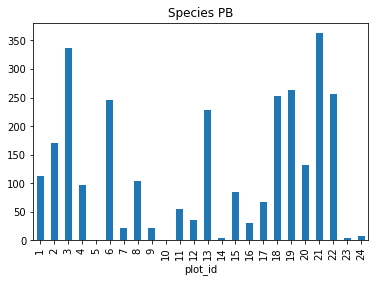

In [423]:
ax = survey_grouped.loc[:,'PB'].plot(kind='bar', title='Species PB')